___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew
from sklearn.model_selection import cross_validate
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("final_scout_not_dummy2.csv")

In [3]:
df.head()

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.0,Used,Diesel,"Alloy wheels, Catalytic Converter, Voice Control",7.0,3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,99.0,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.0,Used,Benzine,"Alloy wheels, Sport seats, Sport suspension, V...",7.0,2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,129.0,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.0,Used,Diesel,"Alloy wheels, Voice Control",7.0,3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,99.0,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.0,Used,Diesel,"Alloy wheels, Sport seats, Voice Control",6.0,3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,99.0,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.0,Used,Diesel,"Alloy wheels, Sport package, Sport suspension,...",7.0,3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,109.0,Premium,Plus,Safety Premium Package


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   15909 non-null  object 
 1   body_type                    15909 non-null  object 
 2   price                        15909 non-null  int64  
 3   km                           15909 non-null  float64
 4   Type                         15909 non-null  object 
 5   Fuel                         15909 non-null  object 
 6   Extras                       15909 non-null  object 
 7   Gears                        15909 non-null  float64
 8   age                          15909 non-null  float64
 9   Previous_Owners              15909 non-null  float64
 10  hp_kW                        15909 non-null  float64
 11  Inspection_new               15909 non-null  int64  
 12  Paint_Type                   15909 non-null  object 
 13  Upholstery_type 

In [5]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
count,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000
mean,18020.241876,32092.436526,5.937268,1.389591,1.042869,88.493746,0.247156,1428.657364,1337.675467,4.824329,117.783110
std,7377.200813,36982.838757,0.704943,1.121355,0.339241,26.671943,0.431372,275.852413,199.672043,0.887890,18.022786
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000,45.000000
25%,12850.000000,1913.000000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.000000,104.000000
50%,16900.000000,20410.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000,117.000000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000,129.000000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000,253.000000


In [6]:
df.isnull().sum()

make_model                     0
body_type                      0
price                          0
km                             0
Type                           0
Fuel                           0
Extras                         0
Gears                          0
age                            0
Previous_Owners                0
hp_kW                          0
Inspection_new                 0
Paint_Type                     0
Upholstery_type                0
Gearing_Type                   0
Displacement_cc                0
Weight_kg                      0
Drive_chain                    0
cons_comb                      0
CO2_Emission                   0
Comfort_Convenience_Package    0
Entertainment_Media_Package    0
Safety_Security_Package        0
dtype: int64

### Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal. 

In [7]:
df_object = df.select_dtypes(include="object").head()
df_object

,make_model,body_type,Type,Fuel,Extras,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Catalytic Converter, Voice Control",Metallic,Cloth,Automatic,front,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,Used,Benzine,"Alloy wheels, Sport seats, Sport suspension, V...",Metallic,Cloth,Automatic,front,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Voice Control",Metallic,Cloth,Automatic,front,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Sport seats, Voice Control",Metallic,Cloth,Automatic,front,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Sport package, Sport suspension,...",Metallic,Cloth,Automatic,front,Premium,Plus,Safety Premium Package


In [8]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

make_model                    : 8
body_type                     : 8
Type                          : 5
Fuel                          : 3
Extras                        : 659
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3
Comfort_Convenience_Package   : 3
Entertainment_Media_Package   : 2
Safety_Security_Package       : 3


#### Converting the Extras feature from object to numeric

In [9]:
for i in df.Extras:
    print(i)

Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels, Sport seats, Sport suspension, Voice Control
Alloy wheels, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Sport package, Sport suspension, Voice Control
Alloy wheels, Sport package, Sport seats, Sport suspension
Alloy wheels, Sport package, Sport seats, Sport suspension
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Shift paddles
Alloy wheels, Sport seats
Alloy wheels, Catalytic Converter, Sport package, Sport seats, Sport suspension, Voice Control
Alloy wheels, Sport seats, Sport suspension
Alloy wheels, Sport seats, Sport suspension
Alloy wheels
Alloy wheels, Sport package, Sport seats
Alloy wheels, Sport package
Alloy wheels
Alloy wheels, Catalytic Converter, Shift paddles, Voice Control
Alloy wheels, Shift paddles, Sport package, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Catalytic Converter, Sport seats, Voice Control, Winter tyres
Alloy wheels
Alloy wheels, Voice C

Alloy wheels, Voice Control
Alloy wheels, Catalytic Converter, Sport package, Touch screen, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Sport suspension, Touch screen, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels, Sport seats, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels, Catalytic Converter, Touch screen
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels, Sport package, Sport suspension
Alloy wheels
Alloy wheels, Voice Control
Alloy wheels, Voice Control
Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels, Catalytic Converter, Sport package, Touch screen, Voice Control
A

Alloy wheels, Catalytic Converter
Alloy wheels, Cab or rented Car, Roof rack
Alloy wheels
Alloy wheels
Alloy wheels
Catalytic Converter
Alloy wheels
Alloy wheels, Sport suspension
Alloy wheels, Sport seats, Sport suspension
Alloy wheels
Alloy wheels, Sport seats
Alloy wheels, Sport package, Sport seats, Sport suspension
Alloy wheels, Sport seats
Alloy wheels, Sport seats, Sport suspension, Voice Control
Catalytic Converter, Roof rack, Touch screen, Voice Control
Alloy wheels, Sport suspension
Alloy wheels
Alloy wheels, Shift paddles, Voice Control
Alloy wheels, Sport package
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Roof rack
Alloy wheels, Catalytic Converter, Sport package, Sport seats, Sport suspension, Trailer hitch
Roof rack
Alloy wheels, Catalytic Converter, Roof rack, Sport suspension, Voice Control, Winter tyres
Alloy wheels, Sport seats, Trailer hitch
Alloy wheels
Alloy wheels, Sport suspension, Voice Control
Alloy wheels
Alloy wheels, Sport seats, Sport suspension
A

Alloy wheels, Roof rack, Voice Control
Alloy wheels, Touch screen
Alloy wheels
Alloy wheels, Cab or rented Car
Alloy wheels, Sliding door
Sport seats, Touch screen
Alloy wheels, Sport seats, Touch screen, Voice Control
Roof rack, Voice Control
Cab or rented Car, Catalytic Converter, Touch screen
Alloy wheels, Roof rack, Sport seats
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels, Roof rack, Touch screen, Voice Control
Alloy wheels, Roof rack, Touch screen, Voice Control
Alloy wheels, Roof rack, Ski bag, Sport seats, Touch screen, Voice Control
Alloy wheels, Catalytic Converter, Touch screen, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Roof rack, Touch screen, Voice Control
Alloy wheels, Touch screen, Voice Control
Touch screen, Voice Control
Alloy wheels, Roof rack, Touch screen, Voice Control
Alloy wheels, Roof rack, Touch screen
Alloy wheels, Roof rack, Sport seats, Touch screen, Voice Control
Alloy wheels

Alloy wheels
Alloy wheels
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Voice Control
Touch screen
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Catalytic Converter, Touch screen, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Catalytic Converter
Alloy wheels
Alloy wheels
Catalytic Converter
Alloy wheels
Catalytic Converter, Trailer hitch
Alloy wheels
Alloy wheels, Catalytic Converter, Trailer hitch, Voice Control
Alloy wheels, Sport package, Sport seats, Voice Control
Alloy wheels
Voice Control
Alloy wheels
Alloy wheels, Touch screen
Alloy wheels, Sport package, Sport seats, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Sport package, Sport seats, Touch screen, Voice Control
Alloy wheels, Sport package, Sport seats, Touch screen, Voice Control
Alloy wheels, Sport package, Sport seats, Touch screen, Voice Control
Alloy wheels, Catalytic Converter
Alloy wheels
Alloy 

Alloy wheels, Catalytic Converter, Roof rack, Voice Control
Alloy wheels, Roof rack, Ski bag, Sport seats, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Roof rack
Alloy wheels, Roof rack, Ski bag, Sport seats, Touch screen, Voice Control
Alloy wheels, Catalytic Converter, Sport seats, Touch screen, Voice Control
Alloy wheels, Roof rack, Touch screen, Voice Control
Alloy wheels, Roof rack, Touch screen, Voice Control
Alloy wheels, Roof rack, Shift paddles, Touch screen, Trailer hitch
Alloy wheels
Alloy wheels, Catalytic Converter, Ski bag, Touch screen, Voice Control
Alloy wheels, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Roof rack, Shift paddles, Touch screen, Voice Control
Alloy wheels, Sport seats
Alloy wheels, Sport seats
Alloy wheels, Roof rack, Shift paddles, Ski bag, Sport package, Sport seats, Sport suspension, Touch screen, Voice Control
Alloy wheels, Sport seats
Alloy wheels, Catalytic Converter, Roof rack, Sport seats, Touch screen, Voice Control
Alloy w

Alloy wheels, Handicapped enabled, Roof rack, Sport seats, Touch screen, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Shift paddles, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Voice Control
Alloy wheels
Touch screen
Alloy wheels
Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Touch screen, Voice Control, Winter tyres
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Touch screen
Alloy wheels
Alloy wheels
Alloy wheels, Shift paddles, Touch screen
Roof rack, Ski bag, Touch screen, Trailer hitch
Alloy wheels
Alloy wheels, Touch screen
Alloy wheels
Roof rack
Alloy wheels
Alloy wheels
Alloy wheels
Roof rack
Alloy wheels, Touch screen
Alloy wheels
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Catalytic Converter, Touch screen
Alloy wheels, Shift paddles, Sport package, Sport seats, Sport suspension, Touch screen, Voice Control
Alloy wheels, Catalytic Converter, 

In [10]:
df.Extras.apply(lambda x: len(x.split(',')))

0        3
1        4
2        2
3        3
4        4
        ..
15904    2
15905    3
15906    1
15907    2
15908    2
Name: Extras, Length: 15909, dtype: int64

In [11]:
df["Extras"] = df.Extras.apply(lambda x: len(x.split(',')))

In [12]:
df.head()

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.0,Used,Diesel,3,7.0,3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,99.0,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.0,Used,Benzine,4,7.0,2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,129.0,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.0,Used,Diesel,2,7.0,3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,99.0,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.0,Used,Diesel,3,6.0,3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,99.0,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.0,Used,Diesel,4,7.0,3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,109.0,Premium,Plus,Safety Premium Package


In [13]:
df.Extras.nunique()

10

In [14]:
df.Extras.unique()

array([ 3,  4,  2,  1,  6,  5,  7,  8, 10,  9], dtype=int64)

In [15]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']
Comfort_Convenience_Package   : ['Premium' 'Standard' 'Premium Plus']
Entertainment_Media_Package   : ['Plus' 'Standard']
Safety_Security_Package       : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [16]:
df.make_model.value_counts()

Audi A3           3093
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

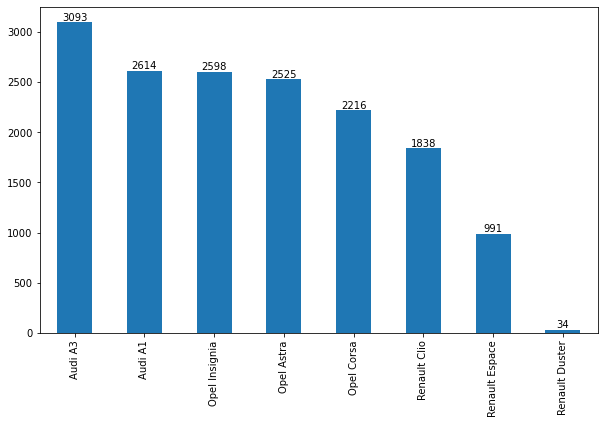

In [17]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.bar_label(ax.containers[0]);

In [18]:
df2 = df.copy()

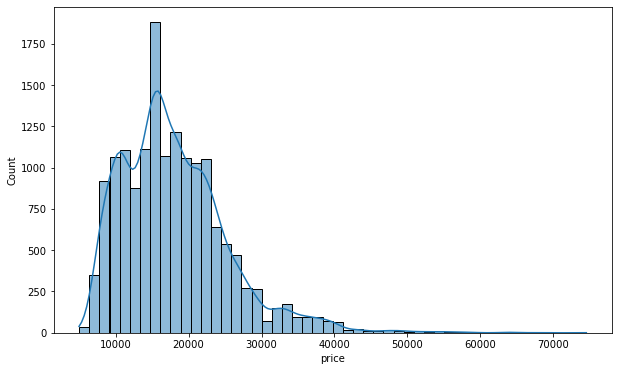

In [19]:
sns.histplot(df.price, bins=50, kde=True);

In [20]:
skew(df.price)

1.2368977644607202

In [21]:
df_numeric = df.select_dtypes(include="number")
df_numeric

,price,km,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
0,15770,56013.000000,3,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,99.0
1,14500,80000.000000,4,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,129.0
2,14640,83450.000000,2,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,99.0
3,14500,73000.000000,3,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,99.0
4,16790,16200.000000,4,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15904,39950,1647.362609,2,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,139.0
15905,39885,9900.000000,3,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4,168.0
15906,39875,15.000000,1,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3,139.0
15907,39700,10.000000,2,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,139.0


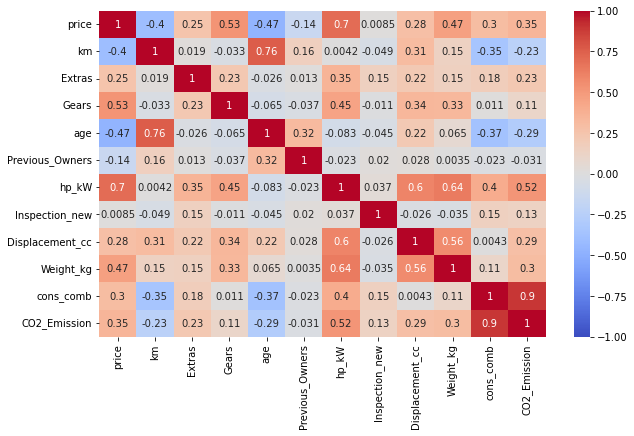

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm');

### multicollinearity control

In [23]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [24]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

In [25]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)].any().any()

False

In [26]:
warnings.filterwarnings('ignore')

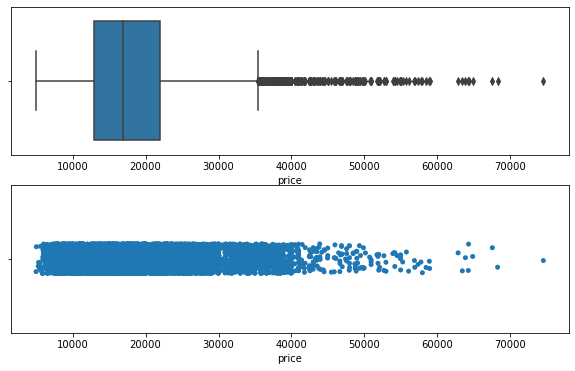

In [27]:
plt.figure(figsize=(10,6))
plt.subplot(211)
sns.boxplot(df.price)
plt.subplot(212)
sns.stripplot(df.price);

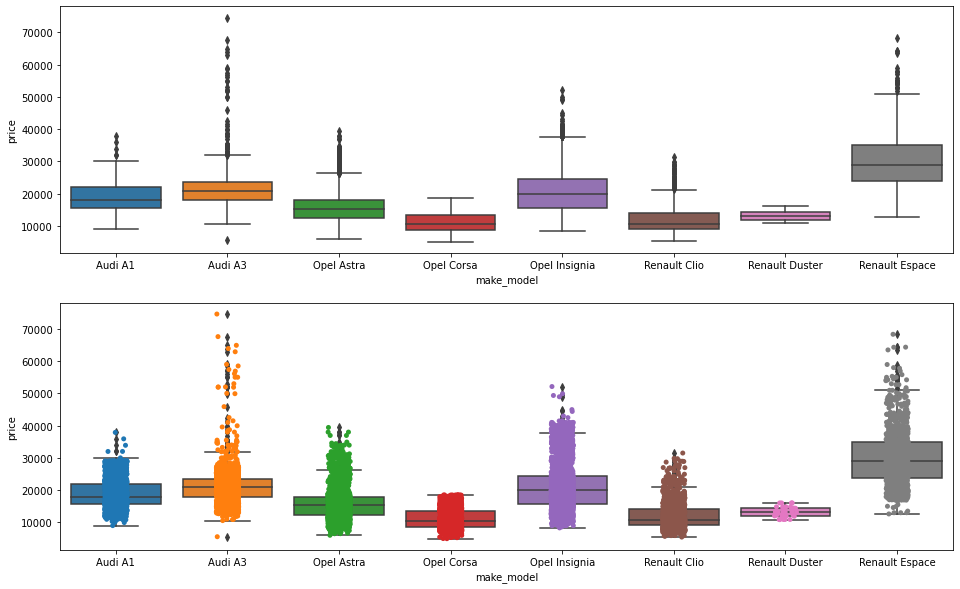

In [28]:
plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
plt.subplot(212)
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
sns.stripplot(x="make_model", y="price", data=df);

In [29]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [30]:
df[df["make_model"] == "Audi A1"]["price"]

0       15770
1       14500
2       14640
3       14500
4       16790
        ...  
2609    21800
2610    21789
2611    21750
2612    21760
2613    21750
Name: price, Length: 2614, dtype: int64

In [31]:
total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"] == model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ", sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 51   ,           The rate of outliers : 0.016
 The count of outlier for Opel Astra      : 134  ,           The rate of outliers : 0.053
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 114  ,           The rate of outliers : 0.044
 The count of outlier for Renault Clio    : 90   ,           The rate of outliers : 0.049
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 22   ,           The rate of outliers : 0.022

Total_outliers :  416 The rate of total outliers : 0.026


## 2. Data Pre-Processing

As you know, the data set must be processed before proceeding to the implementation of the model. As the last step before model fitting, you need to split the data set into train and test. Then, you should train the model with the training data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [32]:
X = df.drop(columns="price")
y = df.price

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### OneHotEncoder  and OrdinalEncoder for X_train

### OneHotEncoder

- Convert nominal categoric features

In [34]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']
Comfort_Convenience_Package   : ['Premium' 'Standard' 'Premium Plus']
Entertainment_Media_Package   : ['Plus' 'Standard']
Safety_Security_Package       : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [35]:
cat = X_train.select_dtypes("object").columns
cat

Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain',
       'Comfort_Convenience_Package', 'Entertainment_Media_Package',
       'Safety_Security_Package'],
      dtype='object')

In [36]:
cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']

In [37]:
X_train[cat_onehot].head()

,make_model,body_type,Type,Fuel,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
15488,Renault Espace,Van,Used,Benzine,Metallic,Part/Full Leather,Automatic,front
13676,Renault Clio,Sedans,Used,Diesel,Metallic,Cloth,Manual,front
9325,Opel Corsa,Sedans,Employee's car,Benzine,Metallic,Cloth,Automatic,front
9968,Opel Corsa,Compact,New,Benzine,Metallic,Cloth,Automatic,front
7701,Opel Astra,Sedans,Used,Benzine,Metallic,Cloth,Automatic,front


In [38]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc.fit_transform(X_train[cat_onehot])

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [39]:
enc.get_feature_names_out(cat_onehot)

array(['make_model_Audi A1', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace',
       'body_type_Compact', 'body_type_Convertible', 'body_type_Coupe',
       'body_type_Off-Road', 'body_type_Sedans',
       'body_type_Station wagon', 'body_type_Transporter',
       'body_type_Van', 'Type_Demonstration', "Type_Employee's car",
       'Type_New', 'Type_Pre-registered', 'Type_Used', 'Fuel_Benzine',
       'Fuel_Diesel', 'Fuel_LPG/CNG', 'Paint_Type_Metallic',
       'Paint_Type_Perl effect', 'Paint_Type_Uni/basic',
       'Upholstery_type_Cloth', 'Upholstery_type_Part/Full Leather',
       'Gearing_Type_Automatic', 'Gearing_Type_Manual',
       'Gearing_Type_Semi-automatic', 'Drive_chain_4WD',
       'Drive_chain_front', 'Drive_chain_rear'], dtype=object)

In [40]:
X_train_onehot = pd.DataFrame(enc.fit_transform(X_train[cat_onehot]), index=X_train.index, 
                           columns=enc.get_feature_names_out(cat_onehot))
X_train_onehot

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
15488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
13676,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9968,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8006,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1547,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### OrdinalEncoder
- Convert ordinal categoric features

In [41]:
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']

In [42]:
for i in cat_ordinal:
    print(f"{i:<27}:", df[i].unique())

Comfort_Convenience_Package: ['Premium' 'Standard' 'Premium Plus']
Entertainment_Media_Package: ['Plus' 'Standard']
Safety_Security_Package    : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [43]:
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

enc2 = OrdinalEncoder(categories=[cat_for_comfort, cat_for_ent, cat_for_safety])

In [44]:
X_train[cat_ordinal]

,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
15488,Standard,Plus,Safety Premium Package
13676,Standard,Plus,Safety Premium Plus Package
9325,Premium,Plus,Safety Premium Package
9968,Premium,Plus,Safety Premium Package
7701,Standard,Plus,Safety Premium Package
...,...,...,...
5695,Premium,Plus,Safety Premium Package
8006,Standard,Standard,Safety Premium Package
1361,Standard,Standard,Safety Premium Plus Package
1547,Standard,Plus,Safety Premium Package


In [45]:
enc2.fit_transform(X_train[cat_ordinal])

array([[0., 1., 1.],
       [0., 1., 2.],
       [1., 1., 1.],
       ...,
       [0., 0., 2.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [46]:
sklearn.__version__

'1.2.2'

In [47]:
enc2.get_feature_names_out(cat_ordinal)

array(['Comfort_Convenience_Package', 'Entertainment_Media_Package',
       'Safety_Security_Package'], dtype=object)

In [48]:
X_train_ordinal = pd.DataFrame(enc2.fit_transform(X_train[cat_ordinal]), index = X_train.index, 
                           columns = enc2.get_feature_names_out(cat_ordinal))

X_train_ordinal

,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
15488,0.0,1.0,1.0
13676,0.0,1.0,2.0
9325,1.0,1.0,1.0
9968,1.0,1.0,1.0
7701,0.0,1.0,1.0
...,...,...,...
5695,1.0,1.0,1.0
8006,0.0,0.0,1.0
1361,0.0,0.0,2.0
1547,0.0,1.0,1.0


In [49]:
X_train_numeric = X_train.select_dtypes("number")
X_train_numeric.head()

,km,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
15488,1510.000000,1,6.0,0.0,1.0,165.0,1,1798.0,1734.0,6.8,153.0
13676,89692.000000,3,5.0,3.0,1.0,55.0,0,1461.0,1165.0,3.3,85.0
9325,9090.000000,1,6.0,1.0,1.0,66.0,0,1398.0,1199.0,5.9,137.0
9968,1647.362609,2,6.0,0.0,1.0,66.0,0,1398.0,1163.0,5.9,136.0
7701,1500.000000,1,6.0,0.0,1.0,112.0,0,1399.0,1273.0,5.4,124.0


In [50]:
X_train_new = X_train_numeric.join([X_train_onehot, X_train_ordinal])
X_train_new

,km,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
15488,1510.000000,1,6.0,0.0,1.0,165.0,1,1798.0,1734.0,6.8,153.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
13676,89692.000000,3,5.0,3.0,1.0,55.0,0,1461.0,1165.0,3.3,85.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
9325,9090.000000,1,6.0,1.0,1.0,66.0,0,1398.0,1199.0,5.9,137.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
9968,1647.362609,2,6.0,0.0,1.0,66.0,0,1398.0,1163.0,5.9,136.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
7701,1500.000000,1,6.0,0.0,1.0,112.0,0,1399.0,1273.0,5.4,124.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,6000.000000,5,6.0,0.0,0.0,85.0,1,999.0,1360.0,5.1,118.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
8006,10.000000,3,5.0,0.0,1.0,77.0,0,999.0,1425.0,5.6,128.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1361,17000.000000,3,5.0,2.0,1.0,70.0,0,999.0,1135.0,4.2,97.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1547,6400.000000,2,5.0,1.0,1.0,60.0,1,999.0,1135.0,4.6,104.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


### OneHotEncoder  and OrdinalEncoder for X_test

### OneHotEncoder

In [51]:
X_test_onehot = pd.DataFrame(enc.transform(X_test[cat_onehot]), index = X_test.index, 
                             columns = enc.get_feature_names_out(cat_onehot))
X_test_onehot

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
227,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7843,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5785,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11608,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11081,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### OrdinalEncoder

In [52]:
X_test_ordinal = pd.DataFrame(enc2.transform(X_test[cat_ordinal]), index = X_test.index, 
                           columns = enc2.get_feature_names_out(cat_ordinal))

X_test_ordinal

,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
227,1.0,0.0,1.0
7843,0.0,1.0,1.0
13774,0.0,0.0,1.0
11996,1.0,1.0,1.0
5785,0.0,1.0,1.0
...,...,...,...
4940,1.0,1.0,1.0
7794,0.0,1.0,1.0
11608,1.0,1.0,1.0
11081,0.0,0.0,1.0


In [53]:
X_test_numeric = X_test.select_dtypes("number")
X_test_numeric.head()

,km,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
227,36625.0,3,7.0,3.0,1.0,85.0,0,1598.0,1180.0,4.0,106.0
7843,7000.0,1,6.0,0.0,1.0,110.0,1,1399.0,1425.0,5.5,127.0
13774,59073.0,1,5.0,3.0,1.0,55.0,0,1461.0,1071.0,3.6,85.0
11996,21000.0,5,6.0,1.0,1.0,121.0,1,1490.0,1503.0,6.1,138.0
5785,75700.0,6,6.0,3.0,2.0,100.0,1,1598.0,1425.0,4.5,119.0


In [54]:
X_test_new = X_test_numeric.join([X_test_onehot, X_test_ordinal])
X_test_new

,km,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
227,36625.000000,3,7.0,3.0,1.0,85.0,0,1598.0,1180.0,4.0,106.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7843,7000.000000,1,6.0,0.0,1.0,110.0,1,1399.0,1425.0,5.5,127.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
13774,59073.000000,1,5.0,3.0,1.0,55.0,0,1461.0,1071.0,3.6,85.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11996,21000.000000,5,6.0,1.0,1.0,121.0,1,1490.0,1503.0,6.1,138.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
5785,75700.000000,6,6.0,3.0,2.0,100.0,1,1598.0,1425.0,4.5,119.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,8500.000000,4,6.0,1.0,1.0,85.0,0,999.0,1360.0,4.7,107.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
7794,1647.362609,3,6.0,0.0,1.0,110.0,1,1398.0,1350.0,5.7,130.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
11608,79640.000000,2,6.0,2.0,1.0,125.0,0,1956.0,1733.0,4.5,119.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
11081,125447.000000,1,6.0,2.0,1.0,100.0,0,1598.0,1513.0,3.9,104.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [55]:
cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']
    
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [56]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety]), cat_ordinal),
                                       remainder='passthrough')

In [57]:
X_train.head()

,make_model,body_type,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
15488,Renault Espace,Van,1510.000000,Used,Benzine,1,6.0,0.0,1.0,165.0,1,Metallic,Part/Full Leather,Automatic,1798.0,1734.0,front,6.8,153.0,Standard,Plus,Safety Premium Package
13676,Renault Clio,Sedans,89692.000000,Used,Diesel,3,5.0,3.0,1.0,55.0,0,Metallic,Cloth,Manual,1461.0,1165.0,front,3.3,85.0,Standard,Plus,Safety Premium Plus Package
9325,Opel Corsa,Sedans,9090.000000,Employee's car,Benzine,1,6.0,1.0,1.0,66.0,0,Metallic,Cloth,Automatic,1398.0,1199.0,front,5.9,137.0,Premium,Plus,Safety Premium Package
9968,Opel Corsa,Compact,1647.362609,New,Benzine,2,6.0,0.0,1.0,66.0,0,Metallic,Cloth,Automatic,1398.0,1163.0,front,5.9,136.0,Premium,Plus,Safety Premium Package
7701,Opel Astra,Sedans,1500.000000,Used,Benzine,1,6.0,0.0,1.0,112.0,0,Metallic,Cloth,Automatic,1399.0,1273.0,front,5.4,124.0,Standard,Plus,Safety Premium Package


In [58]:
X_test.head()

,make_model,body_type,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
227,Audi A1,Compact,36625.0,Used,Diesel,3,7.0,3.0,1.0,85.0,0,Metallic,Part/Full Leather,Automatic,1598.0,1180.0,front,4.0,106.0,Premium,Standard,Safety Premium Package
7843,Opel Astra,Station wagon,7000.0,Used,Benzine,1,6.0,0.0,1.0,110.0,1,Metallic,Cloth,Automatic,1399.0,1425.0,front,5.5,127.0,Standard,Plus,Safety Premium Package
13774,Renault Clio,Sedans,59073.0,Used,Diesel,1,5.0,3.0,1.0,55.0,0,Metallic,Cloth,Manual,1461.0,1071.0,front,3.6,85.0,Standard,Standard,Safety Premium Package
11996,Opel Insignia,Sedans,21000.0,Used,Benzine,5,6.0,1.0,1.0,121.0,1,Metallic,Cloth,Automatic,1490.0,1503.0,front,6.1,138.0,Premium,Plus,Safety Premium Package
5785,Opel Astra,Station wagon,75700.0,Used,Diesel,6,6.0,3.0,2.0,100.0,1,Metallic,Part/Full Leather,Automatic,1598.0,1425.0,front,4.5,119.0,Standard,Plus,Safety Premium Package


In [59]:
X_train.shape, X_test.shape

((12727, 22), (3182, 22))

In [60]:
column_trans.fit_transform(X_train)

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.734e+03, 6.800e+00,
        1.530e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.165e+03, 3.300e+00,
        8.500e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.199e+03, 5.900e+00,
        1.370e+02],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.135e+03, 4.200e+00,
        9.700e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.135e+03, 4.600e+00,
        1.040e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.170e+03, 5.400e+00,
        1.200e+02]])

In [61]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [62]:
X_train_trans.shape, X_test_trans.shape

((12727, 49), (3182, 49))

In [63]:
X_train_trans

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.734e+03, 6.800e+00,
        1.530e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.165e+03, 3.300e+00,
        8.500e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.199e+03, 5.900e+00,
        1.370e+02],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.135e+03, 4.200e+00,
        9.700e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.135e+03, 4.600e+00,
        1.040e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.170e+03, 5.400e+00,
        1.200e+02]])

In [64]:
column_trans.get_feature_names_out()

array(['onehotencoder__make_model_Audi A1',
       'onehotencoder__make_model_Audi A3',
       'onehotencoder__make_model_Opel Astra',
       'onehotencoder__make_model_Opel Corsa',
       'onehotencoder__make_model_Opel Insignia',
       'onehotencoder__make_model_Renault Clio',
       'onehotencoder__make_model_Renault Duster',
       'onehotencoder__make_model_Renault Espace',
       'onehotencoder__body_type_Compact',
       'onehotencoder__body_type_Convertible',
       'onehotencoder__body_type_Coupe',
       'onehotencoder__body_type_Off-Road',
       'onehotencoder__body_type_Sedans',
       'onehotencoder__body_type_Station wagon',
       'onehotencoder__body_type_Transporter',
       'onehotencoder__body_type_Van',
       'onehotencoder__Type_Demonstration',
       "onehotencoder__Type_Employee's car", 'onehotencoder__Type_New',
       'onehotencoder__Type_Pre-registered', 'onehotencoder__Type_Used',
       'onehotencoder__Fuel_Benzine', 'onehotencoder__Fuel_Diesel',
       '

In [65]:
features = column_trans.get_feature_names_out()

In [66]:
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

,onehotencoder__make_model_Audi A1,onehotencoder__make_model_Audi A3,onehotencoder__make_model_Opel Astra,onehotencoder__make_model_Opel Corsa,onehotencoder__make_model_Opel Insignia,onehotencoder__make_model_Renault Clio,onehotencoder__make_model_Renault Duster,onehotencoder__make_model_Renault Espace,onehotencoder__body_type_Compact,onehotencoder__body_type_Convertible,onehotencoder__body_type_Coupe,onehotencoder__body_type_Off-Road,onehotencoder__body_type_Sedans,onehotencoder__body_type_Station wagon,onehotencoder__body_type_Transporter,onehotencoder__body_type_Van,onehotencoder__Type_Demonstration,onehotencoder__Type_Employee's car,onehotencoder__Type_New,onehotencoder__Type_Pre-registered,onehotencoder__Type_Used,onehotencoder__Fuel_Benzine,onehotencoder__Fuel_Diesel,onehotencoder__Fuel_LPG/CNG,onehotencoder__Paint_Type_Metallic,onehotencoder__Paint_Type_Perl effect,onehotencoder__Paint_Type_Uni/basic,onehotencoder__Upholstery_type_Cloth,onehotencoder__Upholstery_type_Part/Full Leather,onehotencoder__Gearing_Type_Automatic,onehotencoder__Gearing_Type_Manual,onehotencoder__Gearing_Type_Semi-automatic,onehotencoder__Drive_chain_4WD,onehotencoder__Drive_chain_front,onehotencoder__Drive_chain_rear,ordinalencoder__Comfort_Convenience_Package,ordinalencoder__Entertainment_Media_Package,ordinalencoder__Safety_Security_Package,remainder__km,remainder__Extras,remainder__Gears,remainder__age,remainder__Previous_Owners,remainder__hp_kW,remainder__Inspection_new,remainder__Displacement_cc,remainder__Weight_kg,remainder__cons_comb,remainder__CO2_Emission
15488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1510.000000,1.0,6.0,0.0,1.0,165.0,1.0,1798.0,1734.0,6.8,153.0
13676,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,89692.000000,3.0,5.0,3.0,1.0,55.0,0.0,1461.0,1165.0,3.3,85.0
9325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,9090.000000,1.0,6.0,1.0,1.0,66.0,0.0,1398.0,1199.0,5.9,137.0
9968,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1647.362609,2.0,6.0,0.0,1.0,66.0,0.0,1398.0,1163.0,5.9,136.0
7701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1500.000000,1.0,6.0,0.0,1.0,112.0,0.0,1399.0,1273.0,5.4,124.0


In [67]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

,onehotencoder__make_model_Audi A1,onehotencoder__make_model_Audi A3,onehotencoder__make_model_Opel Astra,onehotencoder__make_model_Opel Corsa,onehotencoder__make_model_Opel Insignia,onehotencoder__make_model_Renault Clio,onehotencoder__make_model_Renault Duster,onehotencoder__make_model_Renault Espace,onehotencoder__body_type_Compact,onehotencoder__body_type_Convertible,onehotencoder__body_type_Coupe,onehotencoder__body_type_Off-Road,onehotencoder__body_type_Sedans,onehotencoder__body_type_Station wagon,onehotencoder__body_type_Transporter,onehotencoder__body_type_Van,onehotencoder__Type_Demonstration,onehotencoder__Type_Employee's car,onehotencoder__Type_New,onehotencoder__Type_Pre-registered,onehotencoder__Type_Used,onehotencoder__Fuel_Benzine,onehotencoder__Fuel_Diesel,onehotencoder__Fuel_LPG/CNG,onehotencoder__Paint_Type_Metallic,onehotencoder__Paint_Type_Perl effect,onehotencoder__Paint_Type_Uni/basic,onehotencoder__Upholstery_type_Cloth,onehotencoder__Upholstery_type_Part/Full Leather,onehotencoder__Gearing_Type_Automatic,onehotencoder__Gearing_Type_Manual,onehotencoder__Gearing_Type_Semi-automatic,onehotencoder__Drive_chain_4WD,onehotencoder__Drive_chain_front,onehotencoder__Drive_chain_rear,ordinalencoder__Comfort_Convenience_Package,ordinalencoder__Entertainment_Media_Package,ordinalencoder__Safety_Security_Package,remainder__km,remainder__Extras,remainder__Gears,remainder__age,remainder__Previous_Owners,remainder__hp_kW,remainder__Inspection_new,remainder__Displacement_cc,remainder__Weight_kg,remainder__cons_comb,remainder__CO2_Emission
227,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,36625.0,3.0,7.0,3.0,1.0,85.0,0.0,1598.0,1180.0,4.0,106.0
7843,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,7000.0,1.0,6.0,0.0,1.0,110.0,1.0,1399.0,1425.0,5.5,127.0
13774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,59073.0,1.0,5.0,3.0,1.0,55.0,0.0,1461.0,1071.0,3.6,85.0
11996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,21000.0,5.0,6.0,1.0,1.0,121.0,1.0,1490.0,1503.0,6.1,138.0
5785,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,75700.0,6.0,6.0,3.0,2.0,100.0,1.0,1598.0,1425.0,4.5,119.0


In [68]:
X_train.join(y_train).corr()

,onehotencoder__make_model_Audi A1,onehotencoder__make_model_Audi A3,onehotencoder__make_model_Opel Astra,onehotencoder__make_model_Opel Corsa,onehotencoder__make_model_Opel Insignia,onehotencoder__make_model_Renault Clio,onehotencoder__make_model_Renault Duster,onehotencoder__make_model_Renault Espace,onehotencoder__body_type_Compact,onehotencoder__body_type_Convertible,onehotencoder__body_type_Coupe,onehotencoder__body_type_Off-Road,onehotencoder__body_type_Sedans,onehotencoder__body_type_Station wagon,onehotencoder__body_type_Transporter,onehotencoder__body_type_Van,onehotencoder__Type_Demonstration,onehotencoder__Type_Employee's car,onehotencoder__Type_New,onehotencoder__Type_Pre-registered,onehotencoder__Type_Used,onehotencoder__Fuel_Benzine,onehotencoder__Fuel_Diesel,onehotencoder__Fuel_LPG/CNG,onehotencoder__Paint_Type_Metallic,onehotencoder__Paint_Type_Perl effect,onehotencoder__Paint_Type_Uni/basic,onehotencoder__Upholstery_type_Cloth,onehotencoder__Upholstery_type_Part/Full Leather,onehotencoder__Gearing_Type_Automatic,onehotencoder__Gearing_Type_Manual,onehotencoder__Gearing_Type_Semi-automatic,onehotencoder__Drive_chain_4WD,onehotencoder__Drive_chain_front,onehotencoder__Drive_chain_rear,ordinalencoder__Comfort_Convenience_Package,ordinalencoder__Entertainment_Media_Package,ordinalencoder__Safety_Security_Package,remainder__km,remainder__Extras,remainder__Gears,remainder__age,remainder__Previous_Owners,remainder__hp_kW,remainder__Inspection_new,remainder__Displacement_cc,remainder__Weight_kg,remainder__cons_comb,remainder__CO2_Emission,price
onehotencoder__make_model_Audi A1,1.000000,-0.216066,-0.192358,-0.179129,-0.196484,-0.160503,-0.020456,-0.115587,0.217283,-0.011126,-0.007591,-0.026427,0.078733,-0.236094,-0.033229,-0.102799,0.005601,0.025076,0.033693,-0.051700,-0.006772,0.148312,-0.144836,-0.028140,0.015826,-0.018877,-0.012082,0.151274,-0.151274,-0.018640,0.025159,-0.019631,-0.044698,0.045396,-0.007866,-0.067492,-0.015304,0.033410,-0.124474,0.033294,0.019561,-0.026485,0.014689,-0.194060,0.055343,-0.389013,-0.307829,-0.221318,-0.330789,0.053502
onehotencoder__make_model_Audi A3,-0.216066,1.000000,-0.211166,-0.196644,-0.215695,-0.176197,-0.022456,-0.126889,-0.174978,0.051495,-0.005046,-0.029011,0.335165,-0.161666,-0.036478,-0.113900,-0.063957,0.015473,-0.000978,0.017851,0.011745,-0.228578,0.221420,0.057573,-0.028279,-0.020723,0.033359,0.047774,-0.047774,-0.014933,-0.035616,0.150620,-0.036775,0.037699,-0.008635,-0.142591,-0.077574,0.071915,0.087920,-0.009474,0.381930,0.043051,-0.063211,0.026039,-0.088906,0.144764,0.084173,-0.273031,-0.241540,0.191498
onehotencoder__make_model_Opel Astra,-0.192358,-0.211166,1.000000,-0.175067,-0.192028,-0.156864,-0.019992,-0.112966,-0.144233,-0.010874,-0.007018,-0.022201,-0.070986,0.285386,-0.032475,-0.101402,0.020498,-0.007283,-0.000290,-0.057305,0.029320,0.008757,-0.006140,-0.020687,0.058642,-0.008311,-0.058092,0.058848,-0.058848,-0.026246,0.044782,-0.055547,-0.045522,0.046181,-0.007688,0.158821,0.103299,-0.022170,0.052703,0.016412,-0.052688,-0.005998,0.037375,0.071375,0.071445,0.004623,0.041325,-0.061587,-0.068529,-0.127791
onehotencoder__make_model_Opel Corsa,-0.179129,-0.196644,-0.175067,1.000000,-0.178821,-0.146075,-0.018617,-0.105197,0.389128,-0.010126,0.039348,-0.012613,-0.084242,-0.222179,-0.015049,-0.093407,-0.019885,0.009582,-0.045037,0.119059,-0.038399,0.312507,-0.314902,0.017379,-0.023692,-0.001194,0.024454,0.206812,-0.206812,-0.057110,0.062165,-0.015646,-0.044243,0.044832,-0.007159,-0.036677,-0.033849,-0.005182,-0.077994,-0.155342,-0.335830,-0.052421,0.053366,-0.426459,0.052996,-0.140016,-0.339802,0.284629,0.215458,-0.380926
onehotencoder__make_model_Opel Insignia,-0.196484,-0.215695,-0.192028,-0.178821,1.000000,-0.160228,-0.020421,-0.115389,-0.213084,-0.011107,-0.012777,-0.012081,-0.136786,0.429542,-0.033172,-0.103577,0.031373,-0.011202,0.048795,-0.093078,0.015502,-0.179085,0.182756,-0.028092,0.057877,-0.018844,-0.055034,-0.260627,0.260627,0.045557,-0.019782,-0.0764

In [69]:
corr_by_price = X_train.join(y_train).corr()["price"].sort_values()[:-1]
corr_by_price

remainder__age                                     -0.472192
onehotencoder__Gearing_Type_Manual                 -0.436499
remainder__km                                      -0.400541
onehotencoder__Upholstery_type_Cloth               -0.389014
onehotencoder__make_model_Opel Corsa               -0.380926
onehotencoder__Type_Used                           -0.364002
onehotencoder__make_model_Renault Clio             -0.296634
onehotencoder__body_type_Compact                   -0.200210
onehotencoder__Drive_chain_front                   -0.146927
remainder__Previous_Owners                         -0.143518
onehotencoder__make_model_Opel Astra               -0.127791
onehotencoder__Paint_Type_Perl effect              -0.049242
onehotencoder__body_type_Sedans                    -0.048777
onehotencoder__Paint_Type_Uni/basic                -0.039834
onehotencoder__make_model_Renault Duster           -0.031135
onehotencoder__Fuel_Benzine                        -0.017561
onehotencoder__body_type

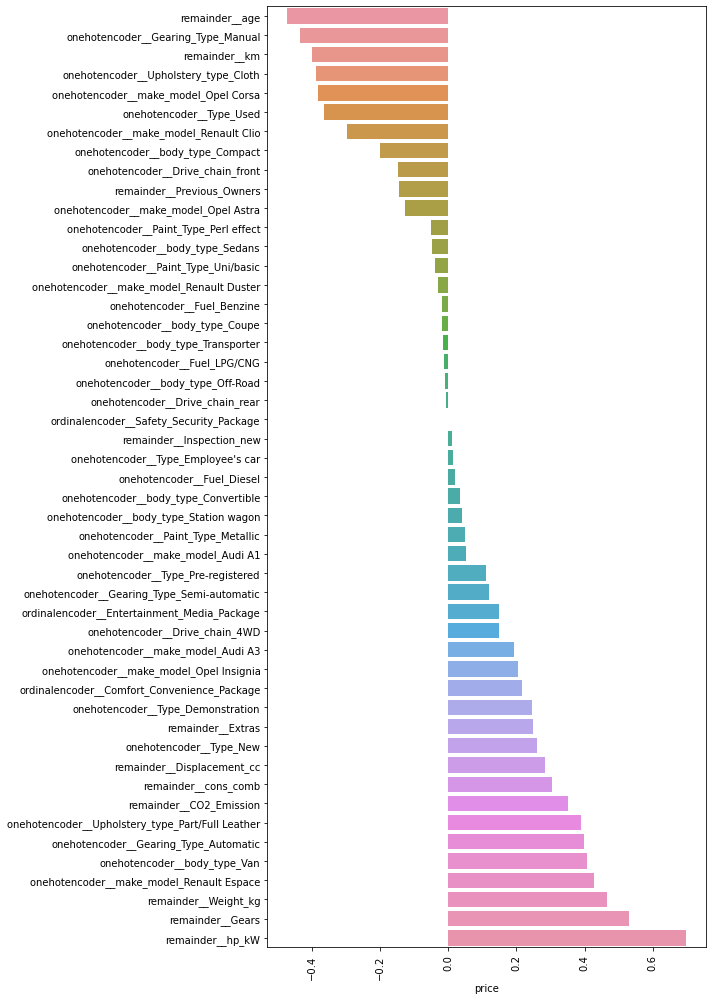

In [70]:
plt.figure(figsize = (10,14))
sns.barplot(y = corr_by_price.index, x = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

### Scaling

In [71]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Implement Linear Regression

 - Import the module
 - Fit the model 
 - Predict the test set
 - Determine feature coefficients
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [72]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [73]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [74]:
pd.options.display.float_format = '{:.3f}'.format

In [75]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.868,0.871
mae,1854.736,1855.373
mse,7226838.123,6876198.108
rmse,2688.278,2622.251


In [76]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [77]:
y_pred = lm.predict(X_test_scaled)

In [78]:
adj_r2(y_test, y_pred, X)


0.8706611064411949

### Cross Validate

In [79]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
             return_train_score=True)

In [80]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.016,0.001,0.862,0.868,-1860.895,-1858.183,-7431285.733,-7208573.114,-2726.038,-2684.879
1,0.024,0.001,0.865,0.868,-1929.965,-1847.381,-7622285.257,-7182674.820,-2760.849,-2680.051
2,0.018,0.002,0.869,0.868,-1903.435,-1855.150,-7145607.676,-7237537.139,-2673.127,-2690.267
3,0.022,0.001,0.857,0.869,-1858.477,-1855.775,-7866827.035,-7161448.855,-2804.786,-2676.088
4,0.017,0.001,0.858,0.869,-1950.788,-1839.932,-8617279.649,-7074728.749,-2935.520,-2659.836
5,0.012,0.000,0.876,0.867,-1795.577,-1863.015,-6802180.936,-7271286.647,-2608.099,-2696.532
6,0.023,0.002,0.873,0.867,-1800.943,-1869.442,-6282056.337,-7334464.353,-2506.403,-2708.222
7,0.021,0.000,0.872,0.868,-1875.581,-1848.255,-7392552.111,-7207428.824,-2718.925,-2684.665
8,0.024,0.000,0.867,0.868,-1823.255,-1862.519,-6969286.981,-7261687.689,-2639.941,-2694.752
9,0.018,0.002,0.866,0.868,-1848.749,-1856.404,-7057438.833,-7260099.694,-2656.584,-2694.457


In [81]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.866
train_r2                                   0.868
test_neg_mean_absolute_error           -1864.767
train_neg_mean_absolute_error          -1855.606
test_neg_mean_squared_error         -7318680.055
train_neg_mean_squared_error        -7219992.988
test_neg_root_mean_squared_error       -2703.027
train_neg_root_mean_squared_error      -2686.975
dtype: float64

In [82]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.868,0.871
mae,1854.736,1855.373
mse,7226838.123,6876198.108
rmse,2688.278,2622.251


In [83]:
2622/df.price.mean()

0.1455030414181288

### Prediction Error with Outliers

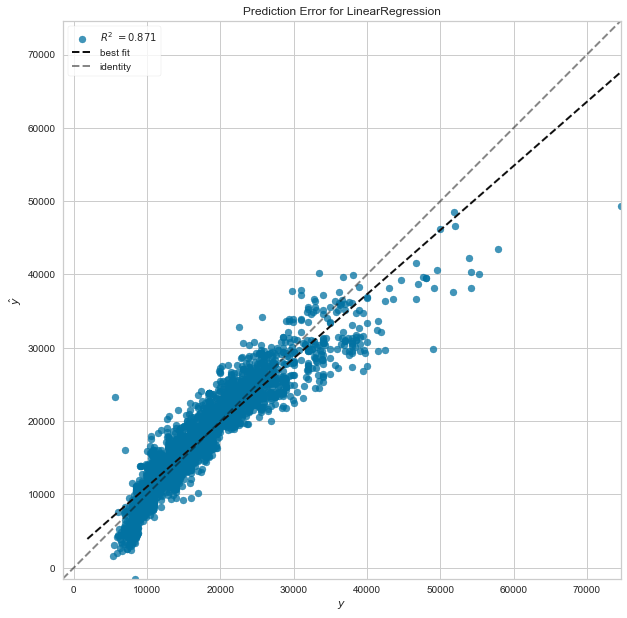

In [84]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

### Residual Plot with Outliers

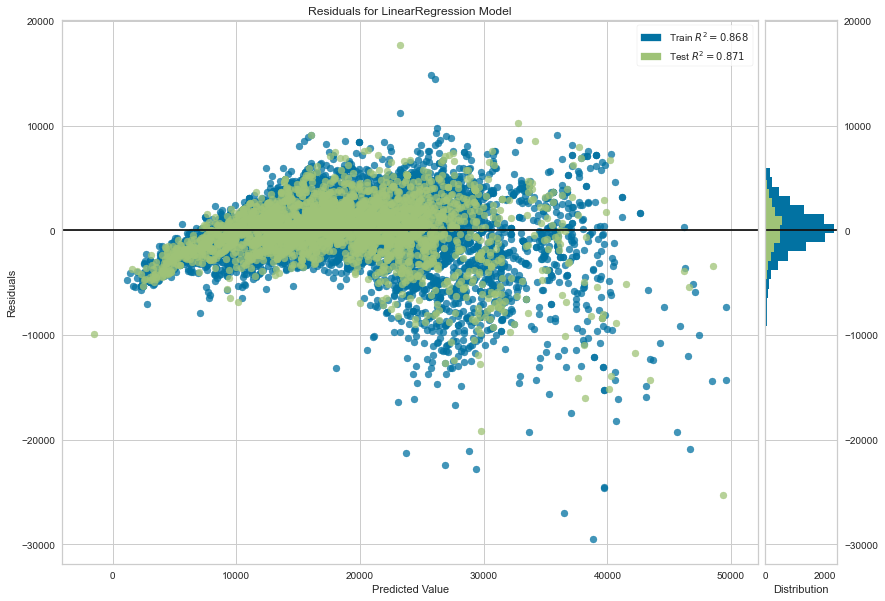

In [85]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test) 
visualizer.show();       

### Dropping outliers from the dataset that worsen my predictions 

- After dropping re-fit and evaluate your model

In [86]:
for model in df2.make_model.unique():
    
    car_prices = df2[df2["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df2[df2["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace=True)
    df2.reset_index(drop=True, inplace=True)
df2

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,3,7.000,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800,99.000,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,4,7.000,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600,129.000,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,2,7.000,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800,99.000,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,3,6.000,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800,99.000,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,4,7.000,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100,109.000,Premium,Plus,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15488,Renault Espace,Van,39950,1647.363,New,Diesel,2,6.000,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300,139.000,Premium,Plus,Safety Premium Package
15489,Renault Espace,Van,39885,9900.000,Used,Benzine,3,7.000,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400,168.000,Premium,Plus,Safety Premium Package
15490,Renault Espace,Van,39875,15.000,Pre-registered,Diesel,1,6.000,0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300,139.000,Standard,Plus,Safety Premium Package
15491,Renault Espace,Van,39700,10.000,Pre-registered,Diesel,2,6.000,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300,139.000,Standard,Plus,Safety Premium Package


In [90]:
df2.shape

(15493, 23)

In [91]:
df3 = df2.copy()

In [93]:
X = df2.drop(columns = "price")
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [94]:
X_train= pd.DataFrame(column_trans.fit_transform(X_train), columns=features, index=X_train.index)
X_test= pd.DataFrame(column_trans.transform(X_test), columns=features, index=X_test.index)

In [95]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

### Prediction Error without Outliers

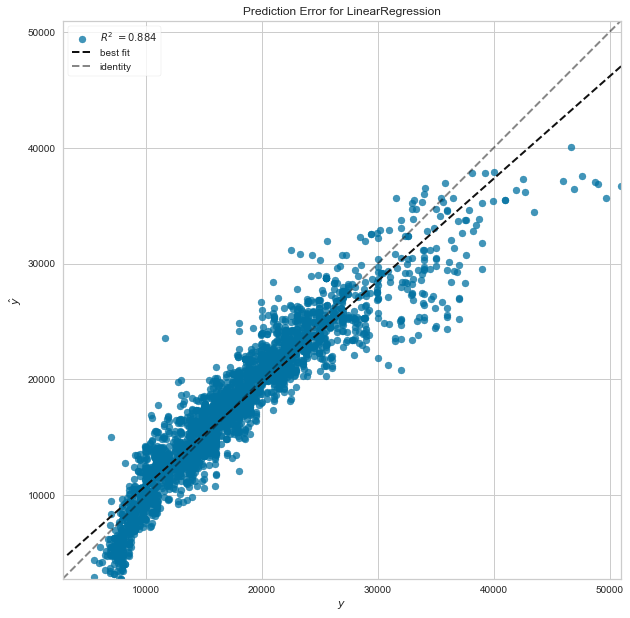

In [97]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

### Residual Plot without Outliers

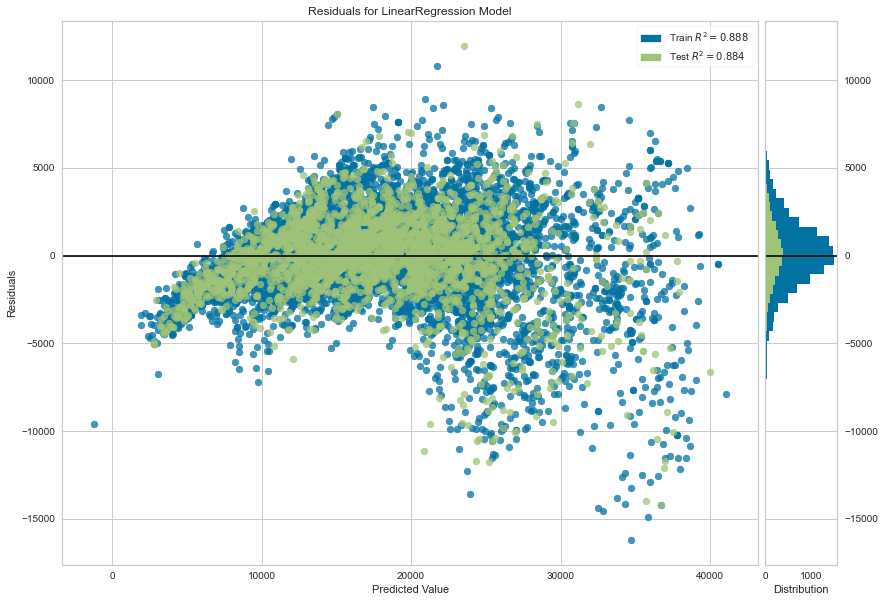

In [98]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show(); 

In [99]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.888,0.884
mae,1629.667,1599.836
mse,5171337.270,5094699.798
rmse,2274.057,2257.144


In [100]:
2257/df2.price.mean() #without outliers

0.12839566957594203

In [101]:
2622/df.price.mean() #with outliers

0.1455030414181288

In [102]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [103]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.877,0.889,-1664.502,-1628.404,-5299348.129,-5165093.306,-2302.031,-2272.684
2,0.888,0.888,-1635.500,-1626.119,-5373647.987,-5148010.304,-2318.113,-2268.923
3,0.893,0.887,-1612.816,-1630.618,-4869331.748,-5221878.634,-2206.656,-2285.143
4,0.888,0.888,-1581.794,-1635.894,-4870111.492,-5205221.992,-2206.833,-2281.496
5,0.886,0.888,-1647.426,-1625.580,-5382932.280,-5149683.758,-2320.115,-2269.291
6,0.893,0.888,-1654.701,-1623.306,-5311338.848,-5155557.656,-2304.634,-2270.585
7,0.887,0.888,-1586.646,-1635.133,-4962300.536,-5214993.677,-2227.622,-2283.636
8,0.880,0.889,-1727.142,-1617.124,-6060379.693,-5073244.437,-2461.784,-2252.386
9,0.887,0.888,-1620.065,-1631.044,-5078820.073,-5185688.551,-2253.624,-2277.211
10,0.889,0.888,-1626.233,-1626.938,-5060045.145,-5183895.074,-2249.454,-2276.817


In [104]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.887
train_r2                                   0.888
test_neg_mean_absolute_error           -1635.683
train_neg_mean_absolute_error          -1628.016
test_neg_mean_squared_error         -5226825.593
train_neg_mean_squared_error        -5170326.739
test_neg_root_mean_squared_error       -2285.087
train_neg_root_mean_squared_error      -2273.817
dtype: float64

In [105]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.888,0.884
mae,1629.667,1599.836
mse,5171337.270,5094699.798
rmse,2274.057,2257.144


In [106]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [107]:
lm2.coef_

array([ 2.22867112e+16,  2.22867112e+16,  2.22867112e+16,  2.22867112e+16,
        2.22867112e+16,  2.22867112e+16,  2.22867112e+16,  2.22867112e+16,
        2.14000000e+02, -2.29950000e+03, -4.67375000e+02,  8.36000000e+02,
        3.63000000e+02,  5.67000000e+02, -9.07000000e+02,  1.69050000e+03,
        1.97637500e+03, -1.14450000e+03,  5.28000000e+02, -4.48500000e+02,
       -9.05000000e+02, -4.69000000e+02,  1.93500000e+02,  2.14750000e+02,
       -8.26000000e+02,  1.47793750e+03, -6.44500000e+02, -3.06000000e+02,
        3.07000000e+02,  3.10000000e+01, -1.70300000e+03,  1.66450000e+03,
        2.13412500e+03, -2.63500000e+02, -1.86414062e+03,  1.12600000e+03,
       -1.13000000e+02,  2.62750000e+02, -1.08025000e+04,  5.92250000e+02,
        1.86250000e+03, -5.23300000e+03,  4.21062500e+02,  1.57700000e+04,
       -5.80000000e+01, -9.34750000e+02, -1.44600000e+03,  5.98000000e+02,
       -2.68525000e+03])

In [108]:
pd.DataFrame(lm2.coef_, index = X_train.columns, columns=["Coef"])

,Coef
onehotencoder__make_model_Audi A1,22286711217010476.000
onehotencoder__make_model_Audi A3,22286711217011816.000
onehotencoder__make_model_Opel Astra,22286711217006452.000
onehotencoder__make_model_Opel Corsa,22286711217004984.000
onehotencoder__make_model_Opel Insignia,22286711217009992.000
onehotencoder__make_model_Renault Clio,22286711217004984.000
onehotencoder__make_model_Renault Duster,22286711217000792.000
onehotencoder__make_model_Renault Espace,22286711217015808.000
onehotencoder__body_type_Compact,214.000
onehotencoder__body_type_Convertible,-2299.500


## Pipeline
- Read the documentation and apply pipeline on the rest of the notebook
- link : https://scikit-learn.org/stable/modules/compose.html

What happens can be described as follows:
The data are split into TRAINING data and TEST data according to ratio of train_test_split

***fit process:***

Step 1: the onehotencoder is fitted on the categoric features in cat_onehot list for TRAINING data

Step 2: the onehotencoder transforms the categoric features in cat_onehot list for TRAINING data

step 3: the ordinalencoder is fitted on the categoric features in cat_ordinal list for TRAINING data

Step 4: the ordinalencoder transforms the categoric features in cat_ordinal list for TRAINING data

step 5: the numeric features of TRAINING data are left as they are

Step 6: the minmaxscaler is fitted on all features of transformed TRAINING data

Step 7: the minmaxscaler transforms all features of transformed TRAINING data

Step 8: the models are fitted/trained using the scaled and transformed TRAINING data

***predict process:***

Step 1: the onehotencoder transforms the categoric features in cat_onehot list of TEST data according to TRAINING data

Step 2: the ordinalencoder transforms the categoric features in cat_ordinal list of TEST data according to TRAINING data

step 3: the numeric features of TRAINING data are left as they are

Step 4: the minmaxscaler transforms all features of TEST data according to TRAINING data

Step 5: the trained models predict using the scaled and transformed TEST data

pipe_model.fit(X_train, y_train) --> columns_trans.fit_transform(X_train) --> scaler.fit_transform(X_train_trans)--> Lasso.fit(X_train_trans_and_scaled, y_train)

pipe_model.predict(X_test)       --> columns_trans.transform(X_test)      -->   scaler.transform(X_test_trans) -->Lasso.predict(X_test_trans_and_scaled)


In [109]:
df2

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,3,7.000,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800,99.000,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,4,7.000,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600,129.000,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,2,7.000,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800,99.000,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,3,6.000,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800,99.000,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,4,7.000,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100,109.000,Premium,Plus,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15488,Renault Espace,Van,39950,1647.363,New,Diesel,2,6.000,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300,139.000,Premium,Plus,Safety Premium Package
15489,Renault Espace,Van,39885,9900.000,Used,Benzine,3,7.000,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400,168.000,Premium,Plus,Safety Premium Package
15490,Renault Espace,Van,39875,15.000,Pre-registered,Diesel,1,6.000,0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300,139.000,Standard,Plus,Safety Premium Package
15491,Renault Espace,Van,39700,10.000,Pre-registered,Diesel,2,6.000,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300,139.000,Standard,Plus,Safety Premium Package


In [110]:
X = df2.drop(columns = ["price"])
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [111]:
X_train.head()

,make_model,body_type,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
5818,Opel Astra,Station wagon,66535.000,Used,Diesel,2,6.000,2.000,2.000,100.000,1,Metallic,Cloth,Automatic,1598.000,1550.000,front,4.500,119.000,Premium,Plus,Safety Premium Package
12640,Opel Insignia,Sedans,8650.000,Used,Benzine,2,6.000,0.000,1.000,121.000,0,Metallic,Part/Full Leather,Manual,1490.000,1503.000,front,6.000,136.000,Premium,Plus,Safety Premium Package
4447,Audi A3,Sedans,3000.000,Used,Benzine,1,7.000,1.000,1.000,85.000,0,Uni/basic,Cloth,Automatic,999.000,1275.000,front,5.100,117.000,Standard,Plus,Safety Premium Package
6061,Opel Astra,Station wagon,89738.000,Used,Benzine,4,6.000,3.000,2.000,103.000,0,Metallic,Cloth,Manual,1364.000,1425.000,front,5.600,133.000,Standard,Standard,Safety Premium Package
9991,Opel Corsa,Sedans,50.000,Pre-registered,Benzine,3,5.000,0.000,1.000,51.000,0,Metallic,Cloth,Manual,1229.000,1163.000,front,5.300,124.000,Standard,Plus,Safety Premium Package


In [112]:
cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']
    
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [113]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                       remainder='passthrough')

In [114]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations)

ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Ridge

In [115]:
from sklearn.linear_model import Ridge

In [116]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [117]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1627.573,1597.596
mse,5169904.474,5092455.314
rmse,2273.742,2256.647


## Cross Validation

In [118]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [119]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.887
train_r2                                   0.888
test_neg_mean_absolute_error           -1633.824
train_neg_mean_absolute_error          -1627.370
test_neg_mean_squared_error         -5219722.126
train_neg_mean_squared_error        -5167461.404
test_neg_root_mean_squared_error       -2283.511
train_neg_root_mean_squared_error      -2273.190
dtype: float64

## Finding best alpha for Ridge

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [123]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [125]:
pipe_model.get_params()

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['make_model', 'body_type', 'Type', 'Fuel',
                                     'Paint_Type', 'Upholstery_type',
                                     'Gearing_Type', 'Drive_chain']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Standard',
                                                                'Premium',
                                                                'Premium Plus'],
                                                               ['Standard',
                                                                'Plus'],
                                                   

In [126]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Stand...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [127]:
ridge_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=1.02))])

In [128]:
ridge_grid_model.best_params_

{'Ridge__alpha': 1.02}

In [129]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.140,0.011,0.019,0.003,0.010,{'Ridge__alpha': 0.01},-2299.489,-2318.104,-2202.087,-2207.578,-2321.512,-2304.660,-2222.846,-2461.230,-2251.460,-2248.536,-2283.750,72.975,2,-2272.024,-2268.926,-2281.697,-2281.324,-2268.703,-2270.596,-2279.796,-2252.257,-2276.399,-2276.669,-2272.839,8.294
1,0.118,0.023,0.018,0.005,1.020,{'Ridge__alpha': 1.02},-2299.453,-2316.788,-2204.025,-2204.735,-2320.077,-2305.979,-2219.896,-2460.184,-2251.787,-2252.227,-2283.515,72.782,1,-2272.408,-2269.195,-2282.051,-2281.727,-2269.088,-2270.949,-2280.189,-2252.628,-2276.784,-2277.011,-2273.203,8.301
2,0.120,0.015,0.019,0.007,2.030,{'Ridge__alpha': 2.03},-2300.669,-2316.067,-2206.203,-2203.358,-2319.514,-2307.456,-2218.228,-2459.678,-2253.037,-2255.843,-2284.005,72.535,3,-2273.323,-2269.832,-2282.911,-2282.683,-2270.018,-2271.800,-2281.119,-2253.537,-2277.711,-2277.841,-2274.078,8.314
3,0.111,0.008,0.017,0.003,3.040,{'Ridge__alpha': 3.04},-2302.598,-2315.743,-2208.512,-2202.850,-2319.521,-2308.997,-2217.331,-2459.577,-2254.870,-2259.353,-2284.935,72.279,4,-2274.568,-2270.700,-2284.101,-2283.982,-2271.297,-2272.976,-2282.377,-2254.802,-2278.987,-2278.991,-2275.278,8.327
4,0.119,0.015,0.020,0.004,4.050,{'Ridge__alpha': 4.05},-2304.955,-2315.711,-2210.892,-2202.910,-2319.935,-2310.574,-2216.951,-2459.790,-2257.089,-2262.754,-2286.156,72.034,5,-2276.034,-2271.727,-2285.515,-2285.508,-2272.813,-2274.378,-2283.854,-2256.311,-2280.500,-2280.361,-2276.700,8.341
5,0.150,0.018,0.030,0.010,5.060,{'Ridge__alpha': 5.06},-2307.575,-2315.904,-2213.308,-2203.365,-2320.649,-2312.174,-2216.941,-2460.250,-2259.569,-2266.050,-2287.579,71.807,6,-2277.651,-2272.873,-2287.090,-2287.194,-2274.497,-2275.944,-2285.479,-2257.992,-2282.178,-2281.889,-2278.279,8.355
6,0.140,0.018,0.020,0.002,6.070,{'Ridge__alpha': 6.07},-2310.356,-2316.278,-2215.736,-2204.106,-2321.594,-2313.791,-2217.205,-2460.909,-2262.228,-2269.250,-2289.145,71.600,7,-2279.375,-2274.110,-2288.779,-2288.992,-2276.298,-2277.629,-2287.210,-2259.797,-2283.974,-2283.534,-2279.970,8.371
7,0.129,0.021,0.018,0.001,7.080,{'Ridge__alpha': 7.08},-2313.236,-2316.800,-2218.161,-2205.063,-2322.718,-2315.419,-2217.679,-2461.729,-2265.007,-2272.362,-2290.817,71.414,8,-2281.175,-2275.419,-2290.552,-2290.872,-2278.185,-2279.404,-2289.015,-2261.692,-2285.855,-2285.264,-2281.743,8.388
8,0.135,0.016,0.018,0.002,8.090,{'Ridge__alpha': 8.09},-2316.171,-2317.446,-2220.572,-2206.185,-2323.984,-2317.054,-2218.318,-2462.678,-2267.865,-2275.392,-2292.566,71.249,9,-2283.030,-2276.787,-2292.387,-2292.811,-2280.133,-2281.245,-2290.872,-2263.651,-2287.796,-2287.058,-2283.577,8.407
9,0.114,0.008,0.017,0.002,9.100,{'Ridge__alpha': 9.1},-2319.132,-2318.196,-2222.963,-2207.438,-2325.363,-2318.693,-2219.086,-2463.735,-2270.770,-2278.348,-2294.372,71.102,10,-2284.924,-2278.202,-2294.265,-2294.790,-2282.124,-2283.135,-2292.765,-2265.656,-2289.778,-2288.899,-2285.454,8.427


In [130]:
ridge_grid_model.best_index_

1

In [131]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2283.515
mean_train_score   -2273.203
Name: 1, dtype: object

In [132]:
ridge_grid_model.best_score_

-2283.515064696295

In [133]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1627.568,1597.590
mse,5169954.570,5092452.496
rmse,2273.753,2256.646


In [134]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [135]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge(alpha=1.02))]

ridge_model = Pipeline(steps=operations)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=1.02))])

In [136]:
ridge_model["Ridge"].coef_

array([  2258.68981631,   3532.37889545,  -1679.43171017,  -3358.40977769,
         1748.8593196 ,  -3254.71794024,  -6815.54238103,   7568.17377776,
          209.00769787,  -1889.74201645,   -403.23661355,    383.48555277,
          368.94657826,    530.53720103,   -903.63038181,   1704.63198189,
         1969.98483761,  -1142.19212064,    536.64138332,   -451.56305588,
         -912.87104439,   -420.7858531 ,    186.66579724,    234.12005586,
         -794.52733127,   1425.47669628,   -630.949365  ,   -306.45203111,
          306.45203111,     35.52732065,  -1697.53783939,   1662.01051876,
         1957.65003326,   -379.94515941,  -1577.70487384,   1145.93983609,
         -104.94912815,    258.25669405, -10603.88949056,    607.29849227,
         1860.95217183,  -5275.98489387,    449.43562798,  15207.69639265,
          -48.1713672 ,   -659.02474212,  -1319.01683927,    567.00240084,
        -2484.05410129])

In [137]:
ridge_model["OneHot_Ordinal_Encoder"].get_feature_names_out()

array(['onehotencoder__make_model_Audi A1',
       'onehotencoder__make_model_Audi A3',
       'onehotencoder__make_model_Opel Astra',
       'onehotencoder__make_model_Opel Corsa',
       'onehotencoder__make_model_Opel Insignia',
       'onehotencoder__make_model_Renault Clio',
       'onehotencoder__make_model_Renault Duster',
       'onehotencoder__make_model_Renault Espace',
       'onehotencoder__body_type_Compact',
       'onehotencoder__body_type_Convertible',
       'onehotencoder__body_type_Coupe',
       'onehotencoder__body_type_Off-Road',
       'onehotencoder__body_type_Sedans',
       'onehotencoder__body_type_Station wagon',
       'onehotencoder__body_type_Transporter',
       'onehotencoder__body_type_Van',
       'onehotencoder__Type_Demonstration',
       "onehotencoder__Type_Employee's car", 'onehotencoder__Type_New',
       'onehotencoder__Type_Pre-registered', 'onehotencoder__Type_Used',
       'onehotencoder__Fuel_Benzine', 'onehotencoder__Fuel_Diesel',
       '

In [138]:
pd.DataFrame(ridge_model["Ridge"].coef_, index = ridge_model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

,Coef
remainder__km,-10603.889
onehotencoder__make_model_Renault Duster,-6815.542
remainder__age,-5275.985
onehotencoder__make_model_Opel Corsa,-3358.410
onehotencoder__make_model_Renault Clio,-3254.718
remainder__CO2_Emission,-2484.054
onehotencoder__body_type_Convertible,-1889.742
onehotencoder__Gearing_Type_Manual,-1697.538
onehotencoder__make_model_Opel Astra,-1679.432
onehotencoder__Drive_chain_rear,-1577.705


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [139]:
from sklearn.linear_model import Lasso

In [140]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [141]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1629.119,1596.424
mse,5177208.946,5085246.452
rmse,2275.348,2255.049


## Cross Validation

In [142]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

In [143]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.887
train_r2                                   0.888
test_neg_mean_absolute_error           -1634.322
train_neg_mean_absolute_error          -1628.847
test_neg_mean_squared_error         -5216126.030
train_neg_mean_squared_error        -5174321.986
test_neg_root_mean_squared_error       -2282.698
train_neg_root_mean_squared_error      -2274.698
dtype: float64

## Finding best alpha for Lasso

In [146]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [147]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Stand...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [148]:
lasso_grid_model.best_params_

{'Lasso__alpha': 1.02}

In [149]:
pd.DataFrame(lasso_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,3.480,0.088,0.022,0.004,0.010,{'Lasso__alpha': 0.01},-2299.549,-2318.132,-2202.088,-2207.527,-2321.501,-2304.714,-2222.735,-2461.217,-2251.481,-2248.519,-2283.746,72.989,2,-2272.025,-2268.926,-2281.697,-2281.324,-2268.704,-2270.596,-2279.796,-2252.257,-2276.399,-2276.670,-2272.839,8.294
1,0.947,0.135,0.028,0.007,1.020,{'Lasso__alpha': 1.02},-2298.174,-2317.260,-2203.900,-2199.310,-2319.268,-2306.329,-2216.731,-2460.352,-2254.634,-2251.148,-2282.711,73.613,1,-2273.713,-2270.766,-2283.533,-2283.322,-2270.701,-2272.259,-2282.083,-2254.264,-2278.387,-2278.472,-2274.750,8.311
2,0.522,0.093,0.026,0.008,2.030,{'Lasso__alpha': 2.03},-2302.531,-2318.855,-2206.765,-2197.473,-2320.950,-2307.339,-2215.900,-2461.937,-2261.242,-2255.046,-2284.804,73.871,3,-2276.313,-2273.351,-2286.230,-2286.802,-2273.551,-2274.764,-2284.504,-2256.949,-2280.960,-2281.127,-2277.455,8.372
3,0.365,0.043,0.020,0.002,3.040,{'Lasso__alpha': 3.04},-2308.657,-2322.330,-2211.489,-2200.333,-2324.662,-2309.280,-2215.454,-2464.903,-2268.807,-2259.588,-2288.550,73.940,4,-2280.330,-2277.387,-2290.275,-2290.722,-2277.847,-2278.494,-2288.269,-2261.224,-2284.860,-2284.918,-2281.433,8.262
4,0.415,0.103,0.026,0.007,4.050,{'Lasso__alpha': 4.05},-2314.601,-2326.885,-2216.847,-2204.685,-2328.283,-2312.896,-2215.272,-2469.837,-2273.218,-2264.136,-2292.666,74.425,5,-2284.569,-2281.948,-2294.891,-2295.820,-2282.223,-2283.530,-2292.793,-2266.304,-2288.390,-2289.253,-2285.972,8.153
5,0.277,0.078,0.024,0.005,5.060,{'Lasso__alpha': 5.06},-2320.010,-2330.193,-2221.745,-2210.253,-2331.902,-2316.221,-2215.410,-2473.955,-2277.074,-2267.486,-2296.425,74.594,6,-2288.623,-2285.812,-2298.913,-2300.108,-2286.020,-2287.633,-2296.985,-2269.954,-2292.094,-2292.987,-2289.913,8.285
6,0.306,0.090,0.022,0.004,6.070,{'Lasso__alpha': 6.07},-2325.919,-2333.108,-2226.487,-2216.564,-2334.964,-2318.712,-2215.932,-2478.478,-2279.674,-2269.529,-2299.937,74.813,7,-2292.748,-2289.691,-2302.555,-2304.148,-2289.608,-2291.129,-2301.024,-2273.878,-2295.410,-2296.093,-2293.628,8.265
7,0.269,0.058,0.022,0.008,7.080,{'Lasso__alpha': 7.08},-2332.326,-2336.799,-2231.866,-2223.755,-2338.193,-2321.947,-2216.567,-2482.540,-2282.577,-2271.692,-2303.826,74.857,8,-2297.104,-2293.663,-2306.537,-2308.181,-2293.390,-2295.219,-2304.748,-2277.624,-2299.192,-2299.771,-2297.543,8.297
8,0.220,0.047,0.018,0.003,8.090,{'Lasso__alpha': 8.09},-2339.754,-2341.126,-2237.480,-2231.920,-2341.412,-2325.858,-2217.582,-2487.066,-2285.503,-2274.131,-2308.183,74.963,9,-2301.363,-2298.147,-2310.748,-2313.140,-2297.393,-2299.719,-2308.791,-2281.721,-2303.235,-2304.146,-2301.840,8.400
9,0.240,0.058,0.024,0.006,9.100,{'Lasso__alpha': 9.1},-2347.809,-2346.162,-2243.730,-2241.457,-2344.917,-2330.373,-2219.044,-2491.984,-2288.880,-2277.096,-2313.145,75.022,10,-2306.118,-2302.825,-2315.446,-2318.372,-2301.867,-2304.515,-2313.233,-2286.322,-2307.802,-2308.671,-2306.517,8.479


In [150]:
lasso_grid_model.best_index_

1

In [151]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2282.711
mean_train_score   -2274.750
Name: 1, dtype: object

In [152]:
lasso_grid_model.best_score_

-2282.7105441558137

In [153]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1629.137,1596.409
mse,5177409.984,5085291.420
rmse,2275.392,2255.059


In [154]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [155]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [156]:
pd.DataFrame(lasso_model["Lasso"].coef_, index = lasso_model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

,Coef
remainder__km,-10580.701
onehotencoder__make_model_Renault Duster,-6821.054
remainder__age,-5263.686
onehotencoder__make_model_Opel Corsa,-3554.909
onehotencoder__make_model_Renault Clio,-3396.189
onehotencoder__make_model_Opel Astra,-1880.020
onehotencoder__Gearing_Type_Manual,-1728.303
remainder__CO2_Emission,-1499.373
remainder__Weight_kg,-1034.395
onehotencoder__body_type_Transporter,-930.121


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [157]:
from sklearn.linear_model import ElasticNet

In [158]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [159]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.508,0.505
mae,3671.788,3559.718
mse,22739690.270,21651490.137
rmse,4768.615,4653.116


## Cross Validation

In [160]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [161]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                     0.508
train_r2                                    0.509
test_neg_mean_absolute_error            -3671.517
train_neg_mean_absolute_error           -3669.248
test_neg_mean_squared_error         -22737008.635
train_neg_mean_squared_error        -22704157.757
test_neg_root_mean_squared_error        -4766.857
train_neg_root_mean_squared_error       -4764.876
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [162]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'ElasticNet__l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [163]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Stand...
                                                                                                     'Premium '
                                                                                                     'Plus '
                                                                                                     'Package']]),
                                                                         ['Comfort_Convenience_Package',
                                                                          'Entertainment_Media_Package',
                                                                          'Safety_Security_Package'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [164]:
elastic_grid_model.best_params_

{'ElasticNet__alpha': 1.02, 'ElasticNet__l1_ratio': 1}

In [165]:
elastic_grid_model.best_index_

5

In [166]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[5, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2282.711
mean_train_score   -2274.750
Name: 5, dtype: object

In [167]:
elastic_grid_model.best_score_

-2282.7105441558137

In [168]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1629.137,1596.409
mse,5177409.984,5085291.420
rmse,2275.392,2255.059


In [169]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature İmportance

In [170]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [171]:
df_feat_imp = pd.DataFrame(model["Lasso"].coef_, index = model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

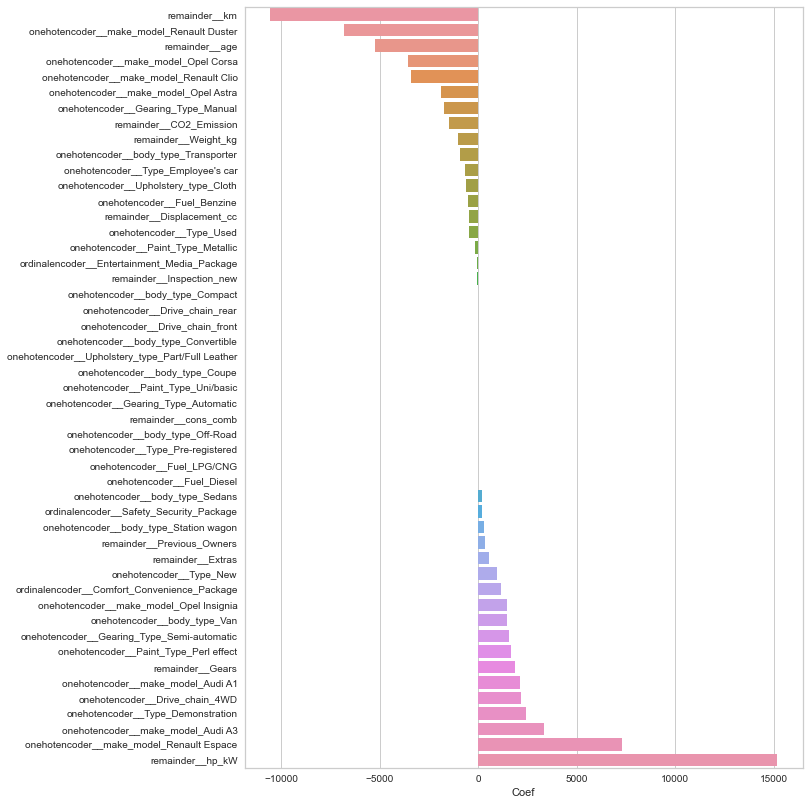

In [172]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp, x=df_feat_imp.Coef, y=df_feat_imp.index);

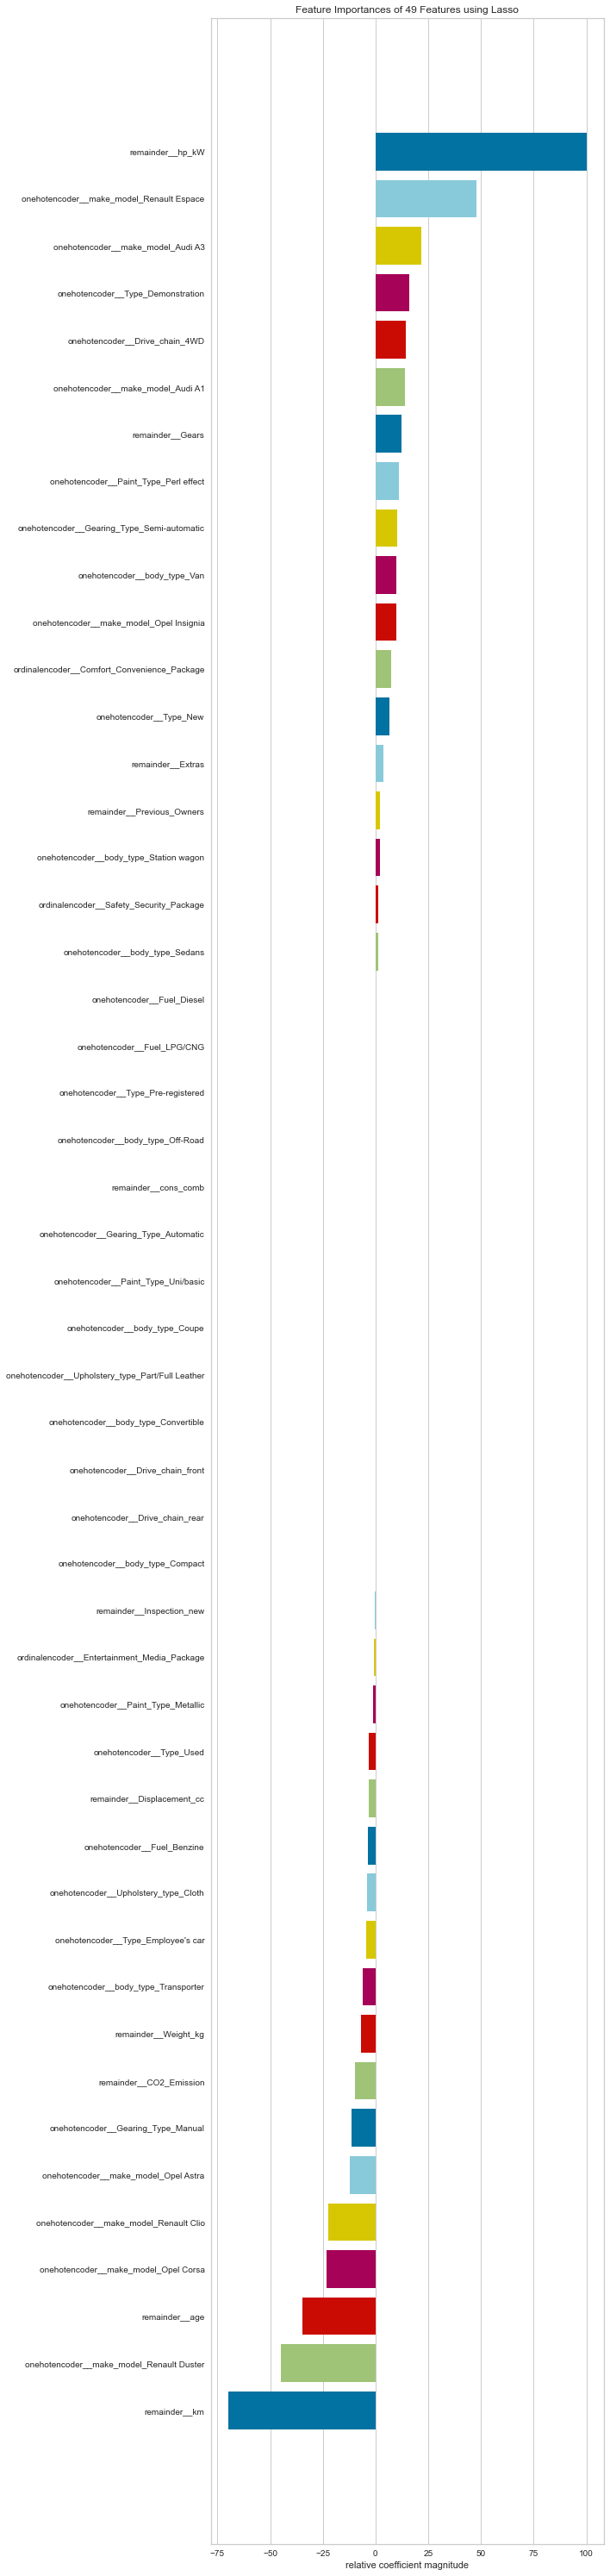

In [173]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

X_train_trans= column_trans.fit_transform(X_train)
X_train_scaled= scaler.fit_transform(X_train_trans)
model = Lasso(alpha=1.02)

viz = FeatureImportances(model, labels=column_trans.get_feature_names_out())
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [174]:
df_new = df2[["make_model", "hp_kW", "km","age", "Gearing_Type", "Gears", "Type", 'Safety_Security_Package', "price"]]

In [175]:
df_new

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package,price
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,Used,Safety Premium Package,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,Used,Safety Premium Package,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,Used,Safety Premium Package,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,Used,Safety Premium Package,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,Used,Safety Premium Package,16790
...,...,...,...,...,...,...,...,...,...
15488,Renault Espace,147.000,1647.363,0.000,Automatic,6.000,New,Safety Premium Package,39950
15489,Renault Espace,165.000,9900.000,0.000,Automatic,7.000,Used,Safety Premium Package,39885
15490,Renault Espace,146.000,15.000,0.000,Automatic,6.000,Pre-registered,Safety Premium Package,39875
15491,Renault Espace,147.000,10.000,0.000,Automatic,6.000,Pre-registered,Safety Premium Package,39700


In [176]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [178]:
X_train.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
5818,Opel Astra,100.000,66535.000,2.000,Automatic,6.000,Used,Safety Premium Package
12640,Opel Insignia,121.000,8650.000,0.000,Manual,6.000,Used,Safety Premium Package
4447,Audi A3,85.000,3000.000,1.000,Automatic,7.000,Used,Safety Premium Package
6061,Opel Astra,103.000,89738.000,3.000,Manual,6.000,Used,Safety Premium Package
9991,Opel Corsa,51.000,50.000,0.000,Manual,5.000,Pre-registered,Safety Premium Package


In [179]:
cat_onehot = ['make_model', 'Type', 'Gearing_Type']
cat_ordinal = ['Safety_Security_Package']

Safety_Security_Package = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']
    
categories = [Safety_Security_Package]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories=categories), cat_ordinal),
                                       remainder='passthrough') #MinMaxScaler()

In [180]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.882,0.879
mae,1656.817,1619.918
mse,5470129.665,5304445.257
rmse,2338.831,2303.138


## Cross Validate

In [181]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

In [182]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.881
train_r2                                   0.882
test_neg_mean_absolute_error           -1659.164
train_neg_mean_absolute_error          -1656.716
test_neg_mean_squared_error         -5489269.264
train_neg_mean_squared_error        -5469107.920
test_neg_root_mean_squared_error       -2341.656
train_neg_root_mean_squared_error      -2338.596
dtype: float64

In [183]:
2303/df_new.price.mean()

0.13101250643925322

In [184]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [185]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.884,1599.836,2257.144
ridge_m,0.884,1597.590,2256.646
lasso_m,0.884,1596.409,2255.059
elastic_m,0.884,1596.409,2255.059
final_m,0.879,1619.918,2303.138


In [186]:
compare = scores.sort_values(by="r2_score", ascending=False)
compare

,r2_score,mae,rmse
lasso_m,0.884,1596.409,2255.059
elastic_m,0.884,1596.409,2255.059
ridge_m,0.884,1597.590,2256.646
linear_m,0.884,1599.836,2257.144
final_m,0.879,1619.918,2303.138


<AxesSubplot:>

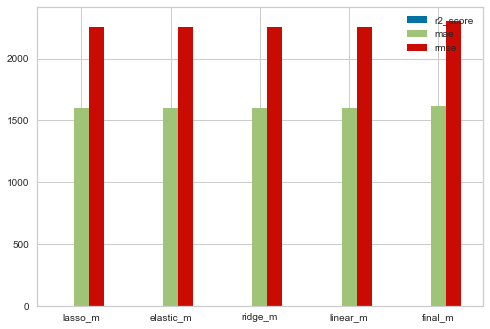

In [198]:
compare.plot.bar(rot=0)

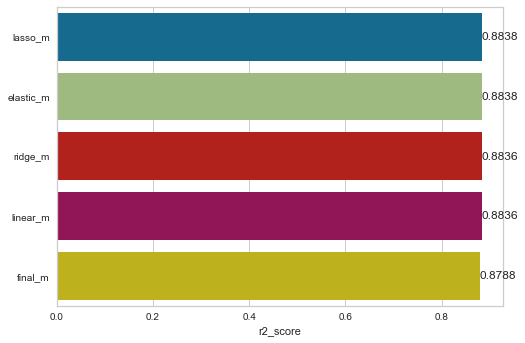

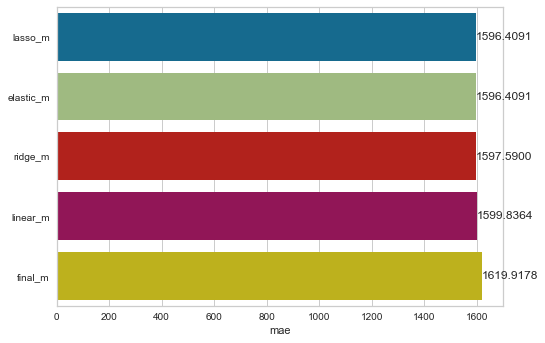

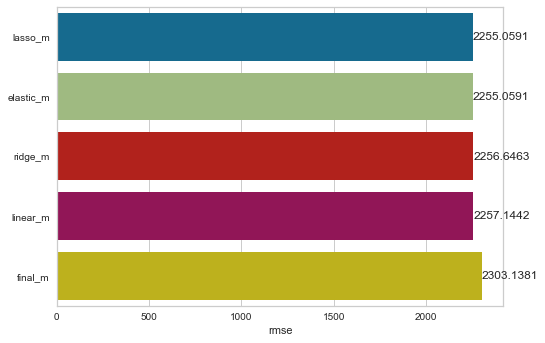

In [200]:
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    ax.bar_label(ax.containers[0], fmt="%.4f");

## Prediction new observation

In [201]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [202]:
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,Used,Safety Premium Package
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,Used,Safety Premium Package
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,Used,Safety Premium Package
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,Used,Safety Premium Package
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,Used,Safety Premium Package


In [203]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
final_model = Pipeline(steps=operations)

In [204]:
final_model.fit(X, y)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'Type',
                                                   'Gearing_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [205]:
my_dict = {
    "make_model": 'Audi A3',
    "hp_kW": 66,
    "km": 17000,
    "age": 2,
    "Gearing_Type": "Automatic",
    "Gears": 7,
    "Type":"Used",
    'Safety_Security_Package':'Safety Premium Package'
}

In [206]:
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,Used,Safety Premium Package
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,Used,Safety Premium Package
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,Used,Safety Premium Package
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,Used,Safety Premium Package
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,Used,Safety Premium Package


In [207]:
new_obs = pd.DataFrame([my_dict])
new_obs

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A3,66,17000,2,Automatic,7,Used,Safety Premium Package


In [208]:
final_model.predict(new_obs)

array([19600.25569825])

In [209]:
my_dict = {
    "make_model": 'Audi A3',
    "km": 17000,
    "hp_kW": 66,
    "age": 2,
    "Gearing_Type": "Automatic",
    "Gears": 7,
    "Type":"Used",
    'Safety_Security_Package':'Safety Premium Package'
}

new_obs = pd.DataFrame([my_dict])
new_obs

,make_model,km,hp_kW,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A3,17000,66,2,Automatic,7,Used,Safety Premium Package


In [210]:
final_model.predict(new_obs)

array([19600.25569825])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___